## Computer Vision

Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

In [6]:
#pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 MB 13.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 20.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 20.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 16.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 26.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.2
    Uninstalling numpy-2.2.2:
      Successfully uninstalled numpy-2.2.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml_dtypes 0.5.1
    Uninstalling ml_dtypes-0.5.1:
      Successfully uninstalled ml_dtypes-0.5.1
Note: you may need to restart the kernel to use updated packages.


In [4]:
#pip install keras

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 2.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 4.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.4/670.4 kB 8.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
#pip install --upgrade numpy scipy pandas tensorflow


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 8.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.1
    Uninstalling scipy-1.15.1:
      Successfully uninstalled scipy-1.15.1
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np

data = np.load('./mnist.npz')

X_train, y_train = data['x_train'], data['y_train']
X_test, y_test = data['x_test'], data['y_test']

I downloaded the data locally because my VS code struggles with SSL verification even after attempts to debug.

In [5]:
print(X_train.shape)
print(X_test.shape)
print(X_train[0].shape)
print(X_test[0].shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(28, 28)
(28, 28)
(60000,)
(10000,)


train- 60k 28 x 28 matrices
test- 10k 28 x 28 matrices

In [25]:
X_train_reshaped = []
X_test_reshaped = []

#Train
for i in range(X_train.shape[0]):
    X_train_reshaped.append(X_train[i].reshape((784,)))

#Test
for i in range(X_test.shape[0]):
    X_test_reshaped.append(X_test[i].reshape((784,))) 

#Convert to numpy array
X_train_reshaped = np.array(X_train_reshaped)
X_test_reshaped = np.array(X_test_reshaped)

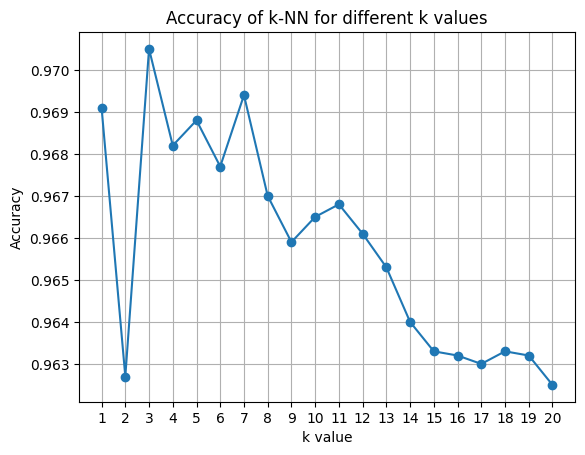

3
0.9705


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k_values = range(1, 21)  #k values 1-20
accuracy_scores = []

#Loop through different k values and evaluate the classifier
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_reshaped, y_train)  #Train model
    y_pred = knn.predict(X_test_reshaped)  #Make predictions
    accuracy = accuracy_score(y_test, y_pred)  #Calculate accuracy
    accuracy_scores.append(accuracy)

#Accuracy for k-values
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title("Accuracy of k-NN for different k values")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(k_values)
plt.show()


optimal_k = k_values[np.argmax(accuracy_scores)]
optimal_accuracy = max(accuracy_scores)
print(optimal_k)
print(optimal_accuracy)

optimal k - 3
accuracy - 97.05%

In [32]:
#Method shown
knn = KNeighborsClassifier(n_neighbors=1)
predictor = knn.fit(X_train_reshaped,y_train) 
y_hat = predictor.predict(X_test_reshaped)

accuracy = knn.score(X_test_reshaped,y_test)
print('Accuracy: ', accuracy)

pd.crosstab(y_test, y_hat)

Accuracy:  0.9691


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,973,1,1,0,0,1,3,1,0,0
1,0,1129,3,0,1,1,1,0,0,0
2,7,6,992,5,1,0,2,16,3,0
3,0,1,2,970,1,19,0,7,7,3
4,0,7,0,0,944,0,3,5,1,22
5,1,1,0,12,2,860,5,1,6,4
6,4,2,0,0,3,5,944,0,0,0
7,0,14,6,2,4,0,0,992,0,10
8,6,1,3,14,5,13,3,4,920,5


Accuracy is .9601 or 96%. This is different than the accuracy returned by confusion matrix in sklearn. Also mine did not work with .values.

Accuracy of Model with k = 3 : 0.9705


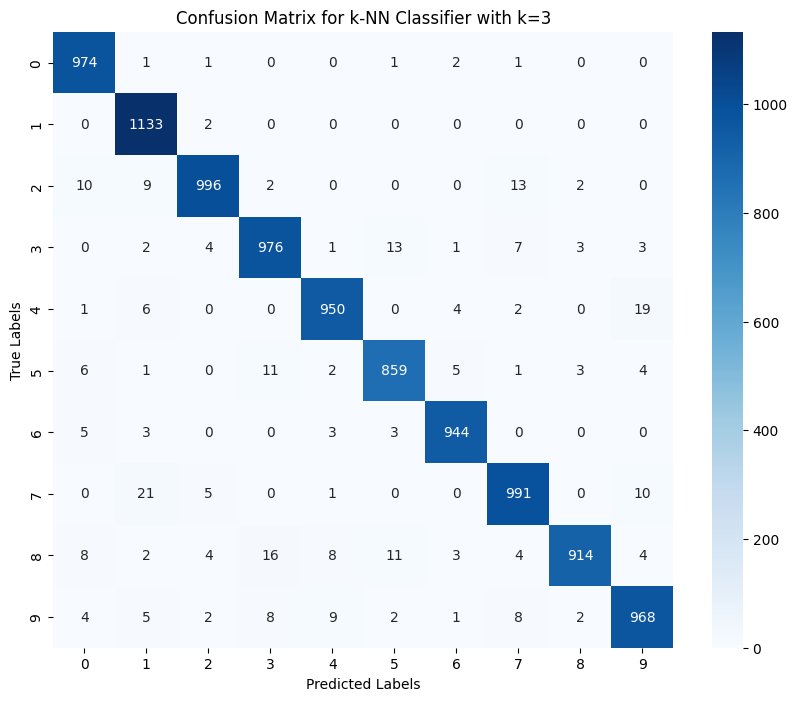

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

optimal_k = 3 

knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_reshaped, y_train)

#Test set
y_pred = knn.predict(X_test_reshaped)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Model with k =", optimal_k, ':', accuracy)

#Confusion matrix (same thing as cross tab above)
cm = confusion_matrix(y_test, y_pred)

#Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title(f"Confusion Matrix for k-NN Classifier with k=3")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Common Mistakes:
- 7 for 1
- 4 for 9
- 8 for 3 or 5
- 9 for 4
- 5 for 3

These mistakes align with reading errors that could be made my humans if numbers are not clearly written (shapes are similar)

7. Add 3 matrices for Red, Green, and Blue with shape 28 x 28 and reshape like how the data was above. Flatten to a 1D array (make them into 1 row) to make it tabular. We follow the same steps of reshaping, standardizing, and analysis in the math class.